In [1]:
import numpy as np # for numerical calculation
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for visualization
import seaborn as sb #for visualization
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose # to find the data has trend seasonal and residual
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing #for smoothing the data

from statsmodels.tsa.stattools import acf,pacf,adfuller # to find best acf,pacf and adfuller for stationary check

from statsmodels.tsa.arima.model import ARIMA # to build AR,MA,ARMA model
from sklearn.metrics import mean_squared_error # to find the error value

In [2]:
train = pd.read_csv('DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv',parse_dates=True,index_col='date') #train data
test =  pd.read_csv('DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv',parse_dates=True,index_col='date') # test data

In [3]:
train.shape # size of train data

(1462, 4)

In [4]:
test.shape  # size of test data

(114, 4)

In [5]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
f_train=train[['meantemp']] # taking meantemp column for further analysis
f_train

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [5]:
lag=4
moving=f_train.rolling(window=lag).mean()

In [7]:
lag=7
moving_avg=f_train.rolling(window=lag).mean()


,meantemp
date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
...,...
2016-12-28,16.480592
2016-12-29,16.188075
2016-12-30,15.980252


In [10]:
n=8
b=f_train.rolling(window=n).mean()


# Using Rolling average

In [12]:
lags = 4
moving_avg = f_train.rolling(window=lags).mean()
moving_avg

,meantemp
date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,8.308333
2013-01-05,7.308333
...,...
2016-12-28,16.302562
2016-12-29,16.612086
2016-12-30,15.850181


In [16]:
df=pd.DataFrame({'actual':f_train['meantemp'],'ma':moving_avg['meantemp']})


In [8]:
data=pd.DataFrame({'Actual':f_train['meantemp'], 'MA':moving_avg['meantemp']})
data

,Actual,MA
date,,
2013-01-01,10.000000,NaN
2013-01-02,7.400000,NaN
2013-01-03,7.166667,NaN
2013-01-04,8.666667,8.308333
2013-01-05,6.000000,7.308333
...,...,...
2016-12-28,17.217391,16.302562
2016-12-29,15.238095,16.612086
2016-12-30,14.095238,15.850181


In [18]:
plt.plot(df.Actual,color='black',label='Actual')

AttributeError: 'DataFrame' object has no attribute 'Actual'

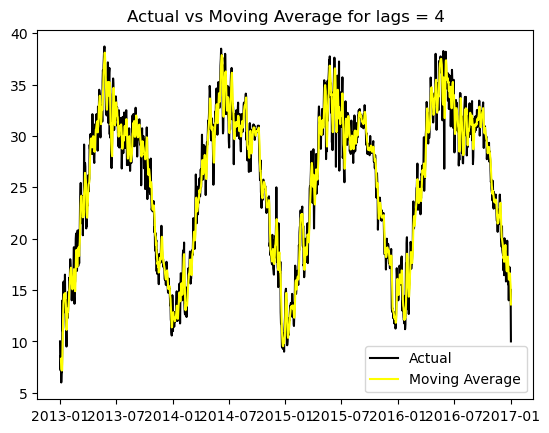

In [9]:
plt.plot(data.Actual,color='black',label = 'Actual')
plt.plot(data.MA,color='yellow',label= 'Moving Average')
plt.title('Actual vs Moving Average for lags = '+str(lags))
plt.legend()
plt.show()


2

# Weekly data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
d=seasonal_decompose(f_train,period=7)
d_trend=d.trend 
d_seasonal=d.seasonal
d_residual=d.resid

In [29]:
d=seasonal_decompose(f_train,period=7)
n=d.trend
b=d.seasonal
v=d.resid



date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04    1.032603
2013-01-05   -1.366375
                ...   
2016-12-28    1.410858
2016-12-29    0.081468
2016-12-30         NaN
2016-12-31         NaN
2017-01-01         NaN
Name: resid, Length: 1462, dtype: float64

In [25]:
decomposition = seasonal_decompose(f_train,period=7) #period = 7 for considering weekly data

d_trend = decomposition.trend #trend
d_seasonal = decomposition.seasonal #seasonal
d_residual = decomposition.resid #residual

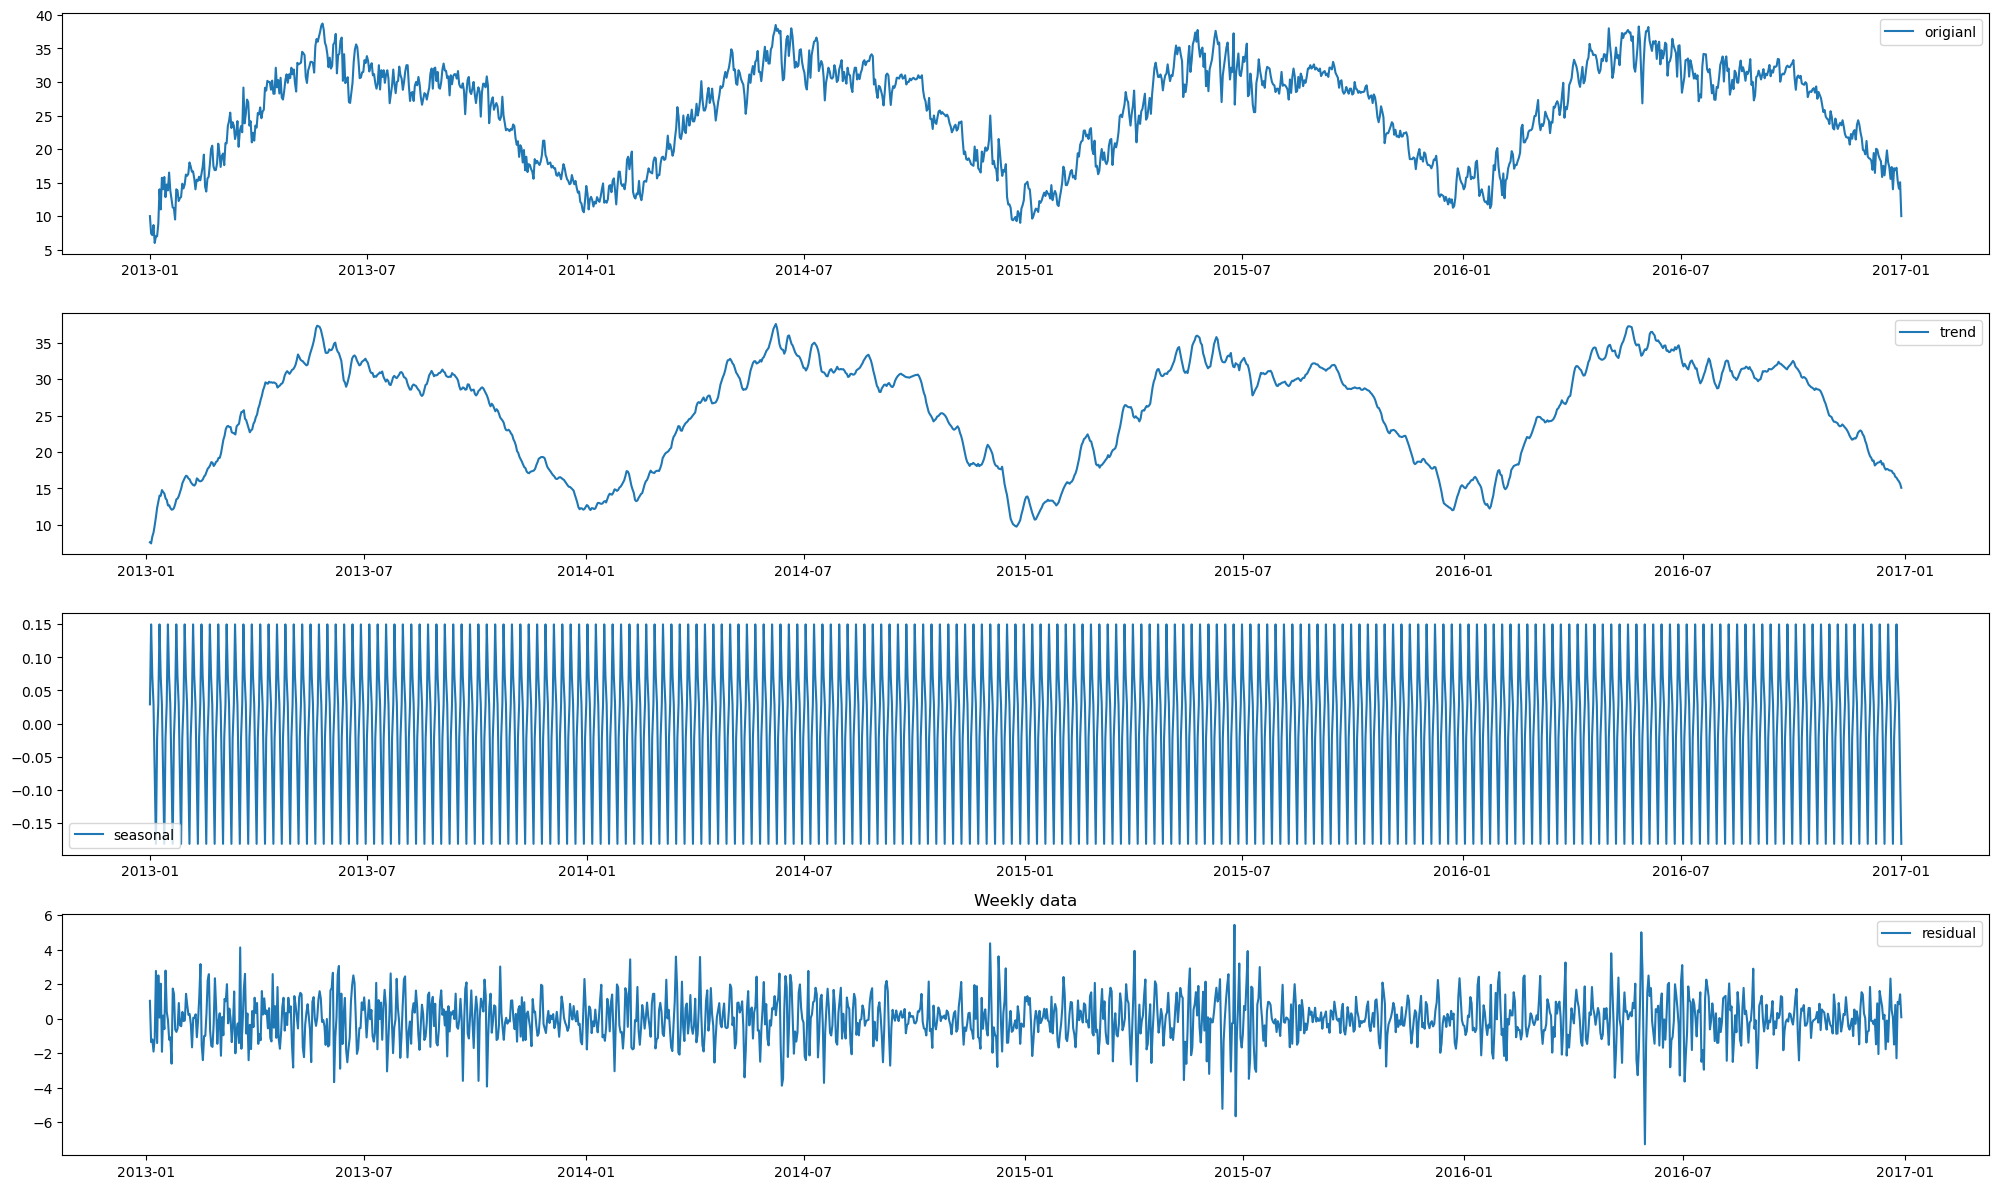

In [11]:
fig, ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(f_train,label='origianl')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='trend')
plt.legend(loc='best')


plt.subplot(413)
plt.plot(d_seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='residual')
plt.legend(loc='best')

plt.title('Weekly data')
plt.tight_layout()

# Monthly data

In [12]:
decomposition_mn = seasonal_decompose(f_train,period=30) # period = 30 for monthly data
dm_trend = decomposition_mn.trend
dm_seasonal = decomposition_mn.seasonal
dm_residual = decomposition_mn.resid

In [32]:
n=seasonal_decompose(f_train,period=30)
b=n.trend


date
2013-01-01   NaN
2013-01-02   NaN
2013-01-03   NaN
2013-01-04   NaN
2013-01-05   NaN
              ..
2016-12-28   NaN
2016-12-29   NaN
2016-12-30   NaN
2016-12-31   NaN
2017-01-01   NaN
Name: trend, Length: 1462, dtype: float64

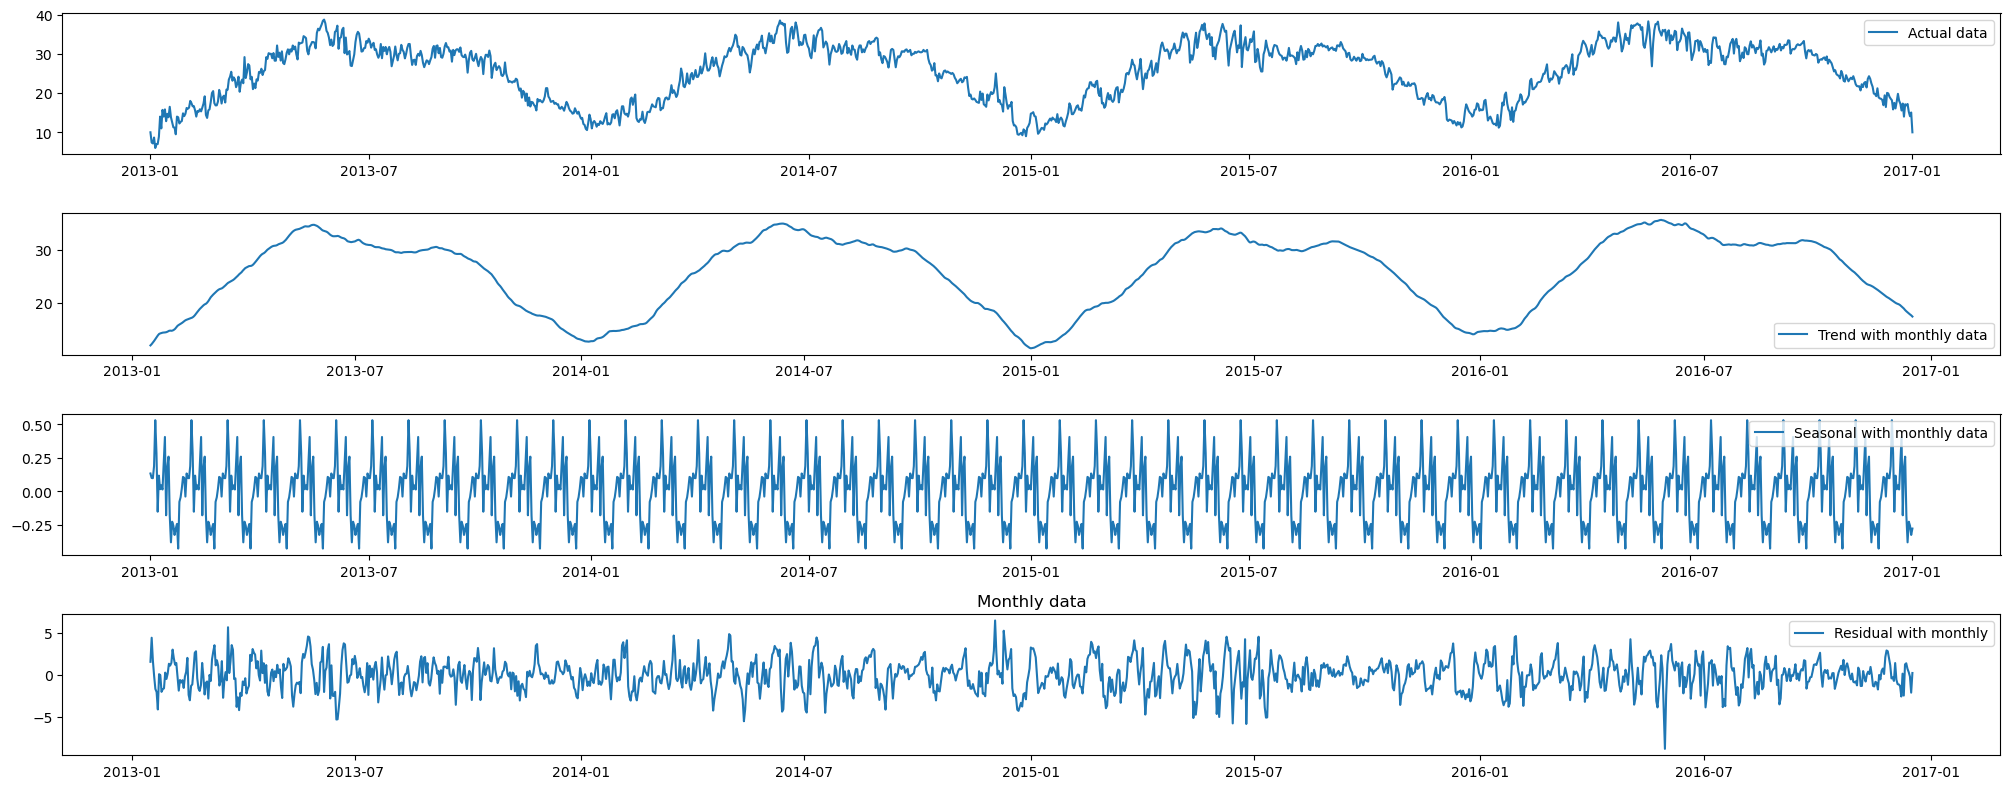

In [13]:
fig,ax = plt.subplots(4,1,figsize=(20,8))
plt.title('Monthly data')

plt.subplot(411)
plt.plot(f_train,label='Actual data')
plt.legend()

plt.subplot(412)
plt.plot(dm_trend,label = 'Trend with monthly data')
plt.legend()

plt.subplot(413)
plt.plot(dm_seasonal,label = 'Seasonal with monthly data')
plt.legend()

plt.subplot(414)
plt.plot(dm_residual,label = 'Residual with monthly')
plt.legend()

plt.tight_layout()

In [14]:
d1= f_train['meantemp']
d1

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

# Resample Technique

In [36]:
n=moving_avg['meantemp'].resample('M').mean()


In [15]:
# monthly 
m_mon=moving_avg['meantemp'].resample('M').mean()
RE_Monthly = pd.DataFrame(m_mon)
RE_Monthly

,meantemp
date,
2013-01-31,12.081707
2013-02-28,16.639084
2013-03-31,22.652055
2013-04-30,28.475119
2013-05-31,33.686703
2013-06-30,32.505188
2013-07-31,30.808756
2013-08-31,29.561214
2013-09-30,29.923730


In [16]:
# weekly data
m_week=moving_avg['meantemp'].resample('W').mean()
RE_Weekly1 = pd.DataFrame(m_week)
RE_Weekly=RE_Weekly1['meantemp']
RE_Weekly

date
2013-01-06     7.608333
2013-01-13    10.573980
2013-01-20    14.304422
2013-01-27    12.205867
2013-02-03    14.793452
                ...    
2016-12-04    21.313567
2016-12-11    18.528745
2016-12-18    18.347826
2016-12-25    17.369326
2017-01-01    15.727526
Freq: W-SUN, Name: meantemp, Length: 209, dtype: float64

# Simple smoothing technique

In [17]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df= pd.DataFrame({'actual':data,'forecast':pdct})
    return(model,df)

In [18]:
d_simple_exp= {}
alphas = [0,0.2,0.6,0.8]

for a in alphas:
    model,df = simplesmoothing(RE_Weekly,a)
    d_simple_exp[a] = df.forecast

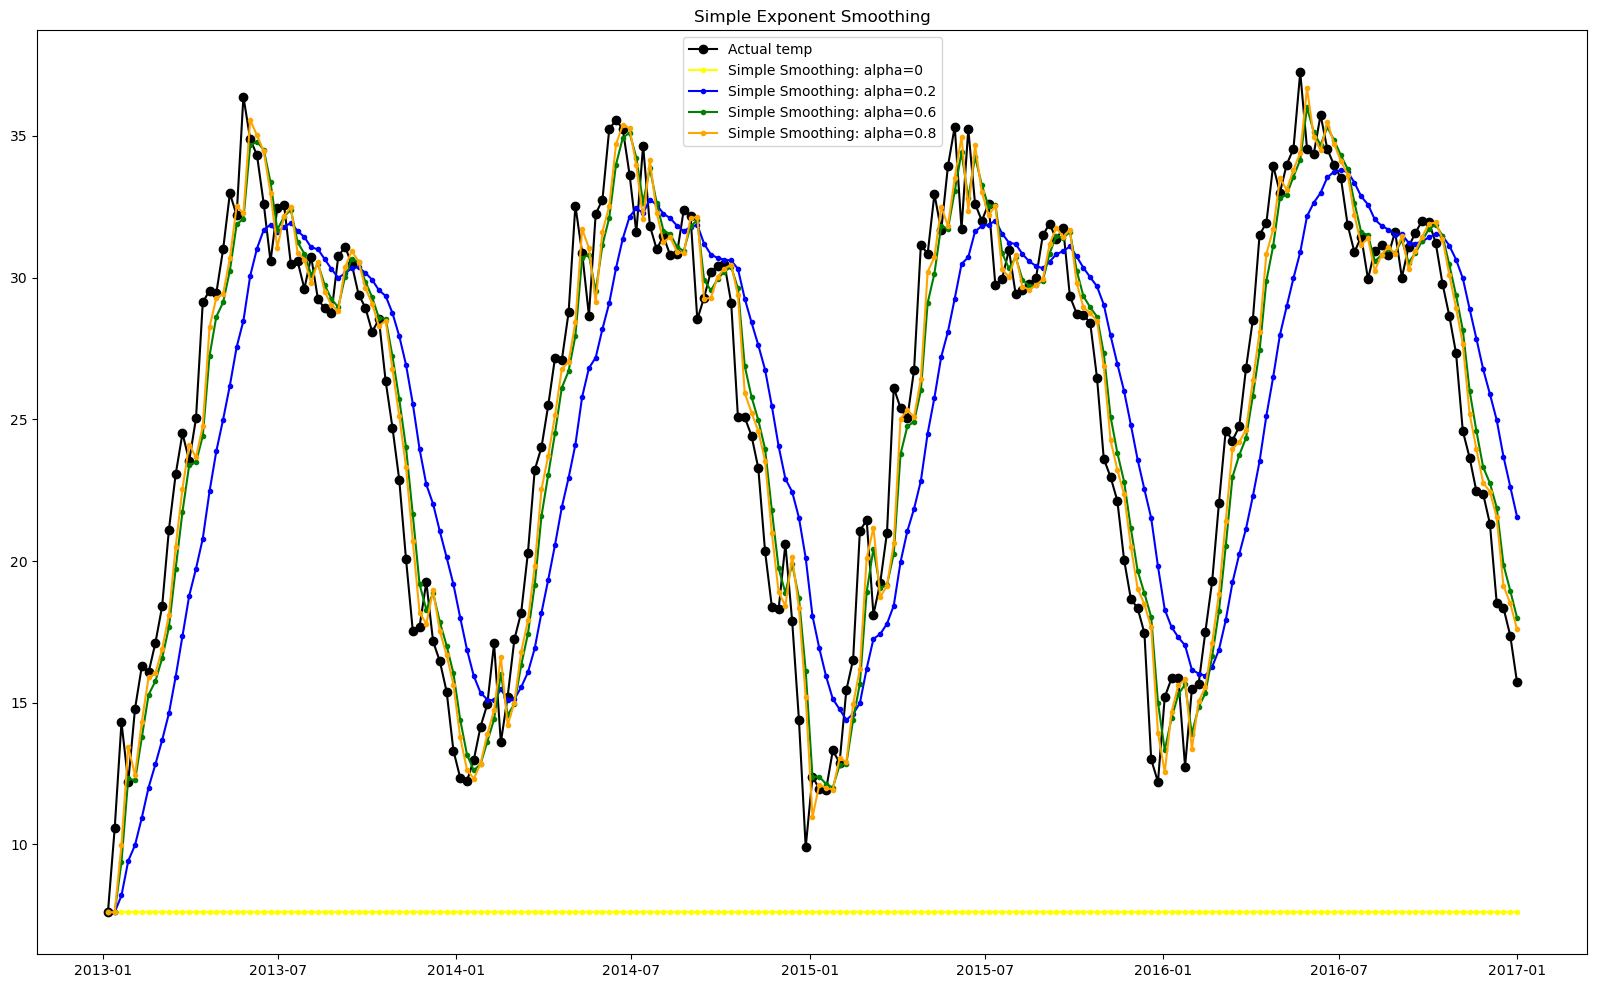

In [20]:
color = ['yellow','blue','green','orange']

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(RE_Weekly,marker='o',color='black',label='Actual temp')


for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=color[i],label='Simple Smoothing: alpha='+ str(alphas[i]))
    
plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

# Double Exponent Smoothing

In [21]:
model = ExponentialSmoothing(RE_Weekly,trend='additive').fit(smoothing_level=0.2,smoothing_slope=0.5)

f_dexp = model.fittedvalues
f_dexp

date
2013-01-06     9.215242
2013-01-13     9.758581
2013-01-20    10.867921
2013-01-27    12.845132
2013-02-03    13.943263
                ...    
2016-12-04    21.141140
2016-12-11    19.333440
2016-12-18    17.249847
2016-12-25    15.656586
2017-01-01    14.357552
Freq: W-SUN, Length: 209, dtype: float64

Text(0.5, 1.0, 'Double Exponent Smoothing')

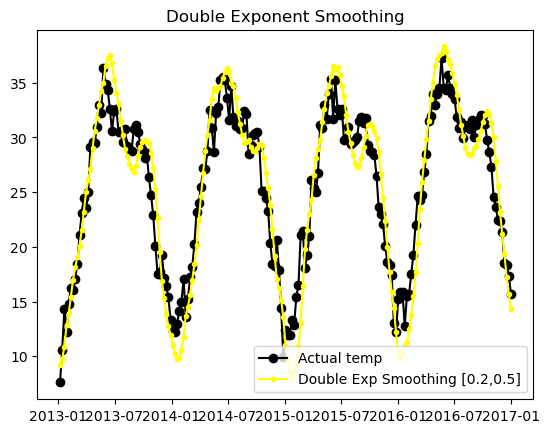

In [22]:
# plot actual and smooting data

plt.plot(RE_Weekly,marker='o',color='black',label = 'Actual temp')
plt.plot(f_dexp,marker='.',color='yellow',label = 'Double Exp Smoothing [0.2,0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

# Triple Exp Smoothing

In [23]:
# weekly data
model1 = ExponentialSmoothing(RE_Weekly.values,trend='add',seasonal='add',seasonal_periods=7).fit()
print(model1)

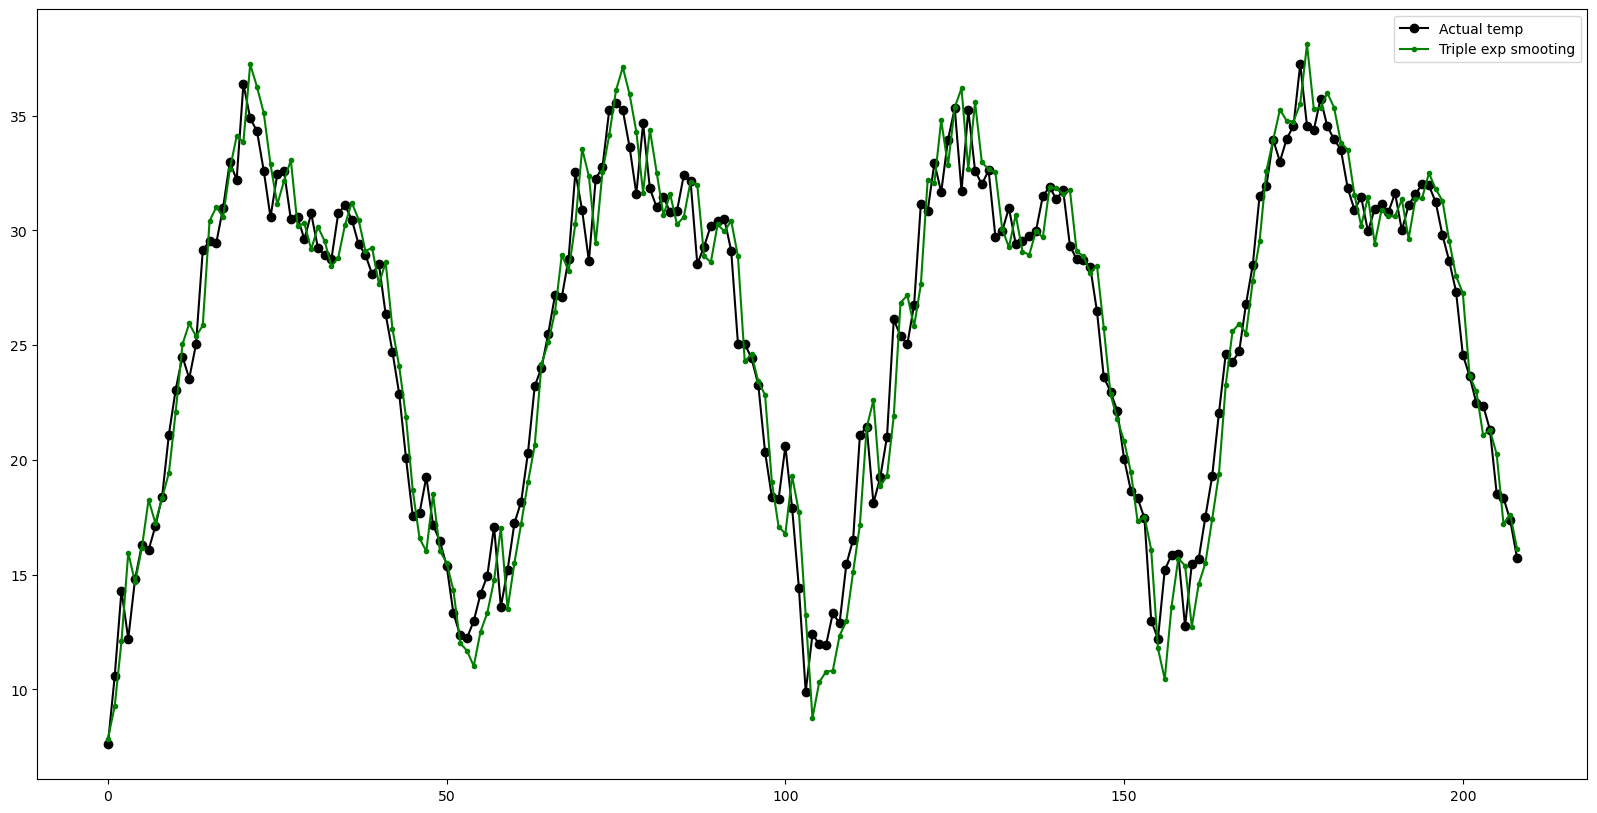

In [24]:
ax = plt.subplots(figsize= (20,10))
plt.plot(RE_Weekly.values,marker='o',color='black',label ='Actual temp')
plt.plot(model1.fittedvalues,marker='.',color='green',label='Triple exp smooting')
plt.legend()

# Task 2
    Stationarity

In [25]:
def checkStationarity(data):
    pvalue = adfuller(data['meantemp'])[1]
    
    print(pvalue)
    
    if pvalue <0.05:
        msg = "Pvalue ={}. Data is Stationary. Procced to model Building".format(pvalue)
    else:
        msg = "Pvalue ={}. Data is not Stationary. Make the data Stationary befor model Building".format(pvalue)
    
    return msg

In [27]:
checkStationarity(RE_Weekly1)

1.1346814817657214e-05


'Pvalue =1.1346814817657214e-05. Data is Stationary. Procced to model Building'

# Task 3
    Time Series Models

1. Use ACF and PACF to determine the order of the model wih 20 lags. Note the p and q values.

In [28]:
import statsmodels.api as sm

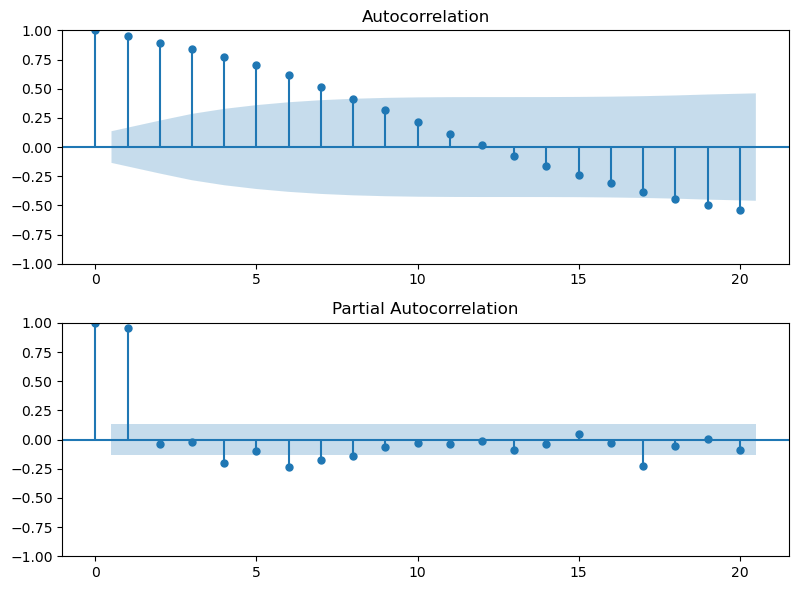

In [53]:
fig = plt.figure(figsize=(8,6))

ax1= fig.add_subplot(211)
# used weekly data for further analysis
sm.graphics.tsa.plot_acf(RE_Weekly,lags=20,ax=ax1)

ax2= fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(RE_Weekly, lags=20, ax= ax2)
plt.tight_layout()

# AR model

In [30]:
ar_m1 = ARIMA(RE_Weekly,order=(1,0,0)).fit()  #p=1

In [31]:
ar_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -425.802
Date:                Mon, 11 Sep 2023   AIC                            857.605
Time:                        10:42:13   BIC                            867.632
Sample:                    01-06-2013   HQIC                           861.659
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4394      3.978      5.389      0.000      13.642      29.237
ar.L1          0.9773      0.015     65.589      0.000       0.948       1.007
sigma2         3.3938      0.345      9.849      0.000       2.718       4.069
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.14   Prob(JB):                         0.91
Heteroskedasticity (H):               0.75   Skew:                             0.05
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
ar_m2= ARIMA(RE_Weekly,order=(2,0,0)).fit() # p =2
ar_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -424.134
Date:                Mon, 11 Sep 2023   AIC                            856.269
Time:                        10:42:13   BIC                            869.638
Sample:                    01-06-2013   HQIC                           861.674
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2074      3.478      6.384      0.000      15.390      29.025
ar.L1          1.1006      0.066     16.597      0.000       0.971       1.231
ar.L2         -0.1276      0.066     -1.924      0.054      -0.258       0.002
sigma2         3.3402      0.342      9.776      0.000       2.671       4.010
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.61   Prob(JB):                         0.90
Heteroskedasticity (H):               0.74   Skew:                             0.05
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
ar_m3= ARIMA(RE_Weekly,order=(3,0,0)).fit() #p=3
ar_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -423.180
Date:                Mon, 11 Sep 2023   AIC                            856.360
Time:                        10:42:13   BIC                            873.072
Sample:                    01-06-2013   HQIC                           863.117
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6379      3.204      7.065      0.000      16.357      28.918
ar.L1          1.0900      0.068     16.105      0.000       0.957       1.223
ar.L2         -0.0231      0.106     -0.218      0.827      -0.231       0.185
ar.L3         -0.0971      0.069     -1.399      0.162      -0.233       0.039
sigma2         3.3098      0.336      9.838      0.000       2.650       3.969
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.52   Prob(JB):                         0.97
Heteroskedasticity (H):               0.74   Skew:                             0.02
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation
AIC score of AR(1) model is 857.605

AIC score of AR(2) model is 856.269

AIC score of AR(3) model is 856.360

Lesser the AIC score is better the model. Hence AR(2)  is the better model.

# MA Model

In [35]:

ma_m1= ARIMA(RE_Weekly,order=(0,0,1)).fit() #q=1
ma_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -596.694
Date:                Mon, 11 Sep 2023   AIC                           1199.388
Time:                        10:42:14   BIC                           1209.415
Sample:                    01-06-2013   HQIC                          1203.442
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4208      0.592     42.920      0.000      24.260      26.582
ma.L1          0.8681      0.038     22.754      0.000       0.793       0.943
sigma2        17.5560      2.055      8.541      0.000      13.527      21.585
===================================================================================
Ljung-Box (L1) (Q):                  99.13   Jarque-Bera (JB):                 6.55
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.80   Skew:                            -0.41
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
ma_m2= ARIMA(RE_Weekly,order=(0,0,2)).fit() #q=2
ma_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -538.383
Date:                Mon, 11 Sep 2023   AIC                           1084.767
Time:                        10:42:14   BIC                           1098.136
Sample:                    01-06-2013   HQIC                          1090.172
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3530      0.662     38.291      0.000      24.055      26.651
ma.L1          1.1891      0.060     19.867      0.000       1.072       1.306
ma.L2          0.6370      0.061     10.367      0.000       0.517       0.757
sigma2        10.0296      0.982     10.209      0.000       8.104      11.955
===================================================================================
Ljung-Box (L1) (Q):                  31.67   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.00   Prob(JB):                         0.40
Heteroskedasticity (H):               0.75   Skew:                            -0.22
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
ma_m3= ARIMA(RE_Weekly,order=(0,0,3)).fit() #q=3
ma_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -494.774
Date:                Mon, 11 Sep 2023   AIC                            999.547
Time:                        10:42:15   BIC                           1016.259
Sample:                    01-06-2013   HQIC                          1006.304
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2608      0.736     34.308      0.000      23.818      26.704
ma.L1          1.2327      0.059     20.876      0.000       1.117       1.348
ma.L2          1.1067      0.071     15.620      0.000       0.968       1.246
ma.L3          0.6462      0.055     11.665      0.000       0.538       0.755
sigma2         6.5790      0.599     10.988      0.000       5.405       7.753
===================================================================================
Ljung-Box (L1) (Q):                  13.03   Jarque-Bera (JB):                 6.93
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.75   Skew:                            -0.34
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation:
AIC score of MA(1) model is 1199.388

AIC score of MA(2) model is 1084.767

AIC score of MA(3) model is 999.547

Lesser the AIC score is better the model. Hence MA(3) is the better model

Train and test data

In [38]:
print("train= {}, test= {}".format(len(train), len(test)))

train= 1462, test= 114


# Build the ARMA model

In [39]:

p=1; q=1
m1= ARIMA(RE_Weekly,order=(p,0,q)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -424.377
Date:                Mon, 11 Sep 2023   AIC                            856.754
Time:                        10:42:15   BIC                            870.123
Sample:                    01-06-2013   HQIC                           862.159
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0479      3.585      6.151      0.000      15.022      29.073
ar.L1          0.9712      0.017     58.256      0.000       0.938       1.004
ma.L1          0.1134      0.070      1.616      0.106      -0.024       0.251
sigma2         3.3480      0.342      9.776      0.000       2.677       4.019
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.83   Prob(JB):                         0.89
Heteroskedasticity (H):               0.75   Skew:                             0.06
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
p= 2; q=1
m2 = ARIMA(RE_Weekly,order=(p,0,1)).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -404.817
Date:                Mon, 11 Sep 2023   AIC                            819.634
Time:                        10:42:15   BIC                            836.346
Sample:                    01-06-2013   HQIC                           826.391
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2345      0.388     65.101      0.000      24.475      25.994
ar.L1          1.9666      0.010    188.048      0.000       1.946       1.987
ar.L2         -0.9804      0.010   -101.061      0.000      -0.999      -0.961
ma.L1         -0.9696      0.033    -29.036      0.000      -1.035      -0.904
sigma2         2.7490      0.280      9.827      0.000       2.201       3.297
===================================================================================
Ljung-Box (L1) (Q):                   3.49   Jarque-Bera (JB):                 3.51
Prob(Q):                              0.06   Prob(JB):                         0.17
Heteroskedasticity (H):               0.76   Skew:                            -0.32
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
p=2; q=2
m3=ARIMA(RE_Weekly,order=(p,0,q)).fit()
print(m3.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -424.178
Date:                Mon, 11 Sep 2023   AIC                            860.357
Time:                        10:42:16   BIC                            880.411
Sample:                    01-06-2013   HQIC                           868.465
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0136      3.620      6.080      0.000      14.918      29.109
ar.L1          0.1928      0.660      0.292      0.770      -1.100       1.486
ar.L2          0.7569      0.640      1.182      0.2

# interpretations
AIC score of ARIMA(1,1) model is 856.754

AIC score of ARIMA(2,1) model is 819.634

AIC score of ARIMA(2,2) model is 860.357

Lesser the AIC value better is the model. Hence ARMA(2,1) is the better model

# Task 4 
Evaluation and Forecasting

In [42]:
Predict = m2.predict(0, len(test)- 1)
Predict

date
2013-01-06    25.234488
2013-01-13     8.053488
2013-01-20    11.850742
2013-01-27    16.185990
2013-02-03    13.600885
                ...    
2015-02-08    13.673612
2015-02-15    16.375044
2015-02-22    17.554160
2015-03-01    22.172521
2015-03-08    22.577725
Freq: W-SUN, Name: predicted_mean, Length: 114, dtype: float64

In [43]:
df_test = test['meantemp']

In [44]:
df_test

date
2017-01-01    15.913043
2017-01-02    18.500000
2017-01-03    17.111111
2017-01-04    18.700000
2017-01-05    18.388889
                ...    
2017-04-20    34.500000
2017-04-21    34.250000
2017-04-22    32.900000
2017-04-23    32.875000
2017-04-24    32.000000
Name: meantemp, Length: 114, dtype: float64

Actual,Predicted,error value

In [45]:
actual = []; pred = []

for i in range(len(Predict)):
    actual.append(df_test[i])
    pred.append(Predict[i])

df_res = pd.DataFrame({'Actual':actual,'Prediction':pred})
df_res['err'] = df_res.Actual - df_res.Prediction
df_res

,Actual,Prediction,err
0,15.913043,25.234488,-9.321445
1,18.500000,8.053488,10.446512
2,17.111111,11.850742,5.260370
3,18.700000,16.185990,2.514010
4,18.388889,13.600885,4.788004
...,...,...,...
109,34.500000,13.673612,20.826388
110,34.250000,16.375044,17.874956
111,32.900000,17.554160,15.345840
112,32.875000,22.172521,10.702479


# Plot predict

<AxesSubplot:>

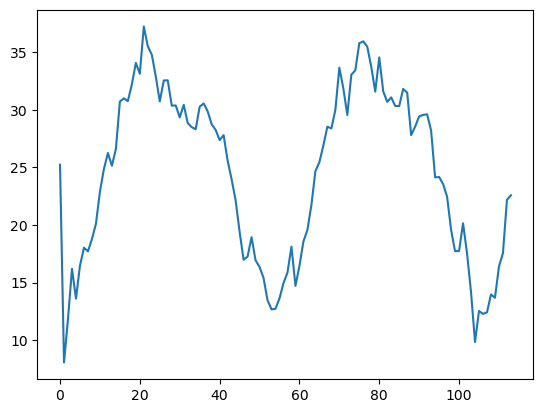

In [46]:
df_res.Prediction.plot() # forecasting value

# Plot error

<AxesSubplot:>

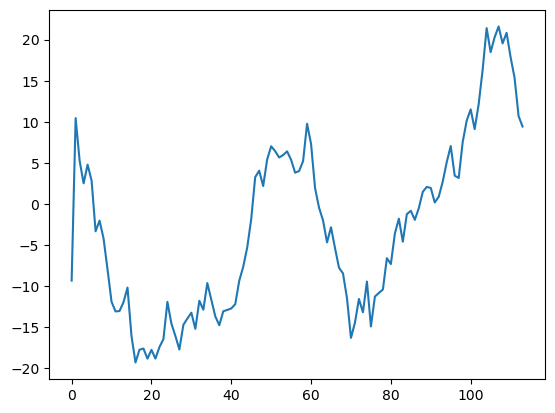

In [47]:
df_res.err.plot() # error ploting

# Plot actual

<AxesSubplot:>

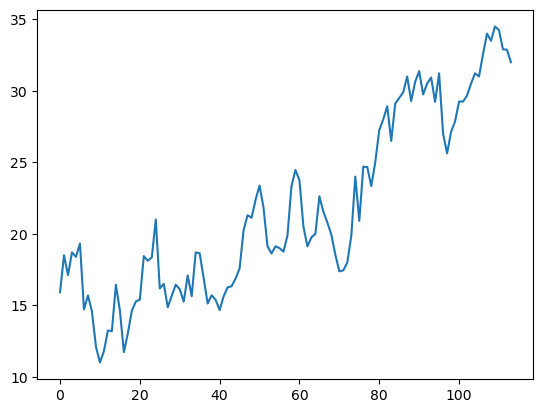

In [48]:
df_res.Actual.plot() # Ground truth

# Perform the LJung-Box test

In [49]:
pvalue = sm.stats.acorr_ljungbox(m3.resid,lags=[2],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print('Reject H0. Bad model')
else:
    print('Fail to Reject H0. Good model')

Fail to Reject H0. Good model


# Calculate MSE and RMSE of the model

In [50]:
mse = mean_squared_error(df_res.Actual,df_res.Prediction)

In [1]:
print("MSE= {}".format(mse))
print("RMSE= {}".format(np.sqrt(mse)))

NameError: name 'mse' is not defined